In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


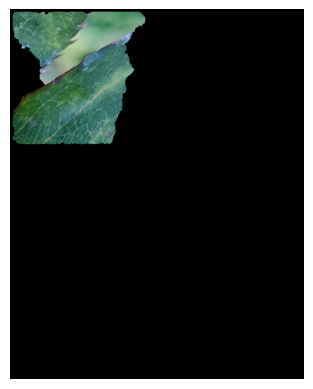

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/drive/MyDrive/Rose Leaf Disease/Data set/original dataset/Original Dataset/Black Spot/Black Spot (1).jpg')

# Create a mask and initialize it as 'background'
mask = np.zeros(image.shape[:2], np.uint8)

# Specify the rectangle that encloses the foreground object
# Format: (x, y, width, height)
rect = (10, 10, 500, 500)

# Run GrabCut algorithm
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to identify the sure foreground and possible background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the input image
segmented_image = image * mask2[:, :, np.newaxis]

# Display the segmented image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [2]:
import numpy as np
import cv2

# Load the image
image_path = "/content/drive/MyDrive/Augmented dataset/Black Spot/Black Spot (1).png"
image = cv2.imread(image_path)

# Convert the image to Lab color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Create a mask with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define the rectangle manually (x, y, width, height)
roi = (50, 50, 300, 500)  # Example coordinates, adjust these values for your image

# Initialize background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# GrabCut segmentation
cv2.grabCut(image, mask, roi, bgdModel, fgdModel, iterations=5, mode=cv2.GC_INIT_WITH_RECT)

# Binarize the mask
binary_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Segment the image
segmented_image = cv2.bitwise_and(image, image, mask=binary_mask)

# Show the results
cv2.imshow("Original image", image)
cv2.imshow("Segmented image", segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: ignored

In [1]:
# from : https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [6]:
# 1. get rectangle coordinates
image_path = "D:/rose lelf dataset/Original Dataset/Black Spot/Black Spot (31).JPG"
image = Image.open(image_path)
image_orig = np.array(image)
image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)

contours, _ = cv2.findContours(np.uint8(image_orig), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

best_rect = None
best_rect_area = 0

for contour in contours:
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box_area = rect[1][0] * rect[1][1]

    if box_area > best_rect_area:
        best_rect = box
        best_rect_area = box_area

min_x = int(min(best_rect[:,0]))
min_y = int(min(best_rect[:,1]))
max_x = int(max(best_rect[:,0]))
max_y = int(max(best_rect[:,1]))
w = max_x - min_x
h = max_y - min_y
x = min_x
y = min_y

rect = (x , y, w, h)

Text(0.5, 1.0, 'GrabCut output')

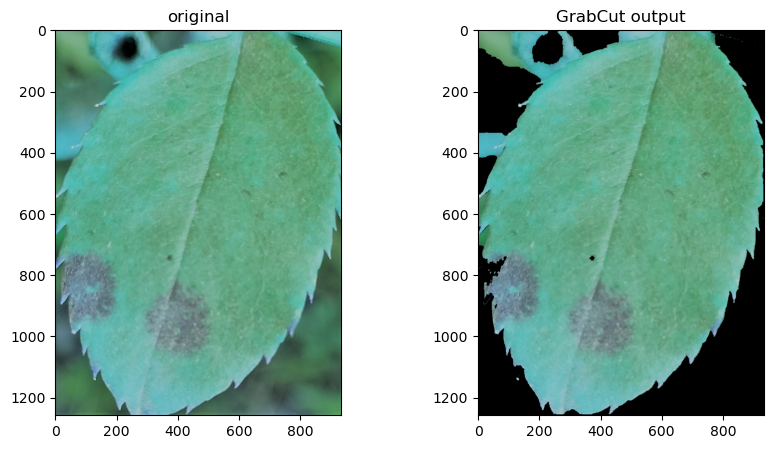

In [7]:
# 2. implement GrabCut

#grabcut needs image opened in cv2
img = cv2.imread(image_path)

mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 6 is the iteration,
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)


mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
result = img * mask[:, :, np.newaxis]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("original")
ax[1].imshow(result, cmap='gray')
ax[1].set_title("GrabCut output")

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image

folder_path = "D:/rose lelf dataset/Original Dataset/Black Spot"
output_folder = "D:/rose lelf dataset/seg/black"

image_files = os.listdir(folder_path)

def get_rect(image_path):
    image = Image.open(image_path)
    image_orig = np.array(image)
    if len(image_orig.shape) == 2:
        gray_image = image_orig  # Grayscale image already
    else:
        gray_image = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)

    contours, _ = cv2.findContours(np.uint8(gray_image), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    best_rect = None
    best_rect_area = 0

    for contour in contours:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box_area = rect[1][0] * rect[1][1]

        if box_area > best_rect_area:
            best_rect = box
            best_rect_area = box_area

    min_x = int(min(best_rect[:,0]))
    min_y = int(min(best_rect[:,1]))
    max_x = int(max(best_rect[:,0]))
    max_y = int(max(best_rect[:,1]))
    w = max_x - min_x
    h = max_y - min_y
    x = min_x
    y = min_y

    rect = (x, y, w, h)

    return rect

for img in image_files:
    image_path = os.path.join(folder_path, img)

    rect = get_rect(image_path)

    # Implement GrabCut
    image2 = cv2.imread(image_path)

    mask = np.zeros(image2.shape[:2], np.uint8)

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    cv2.grabCut(image2, mask, rect, bgdModel, fgdModel, 6, cv2.GC_INIT_WITH_RECT)

    mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    result = image2 * mask[:, :, np.newaxis]
    cv2.imwrite(os.path.join(output_folder, img), result)
